<a href="https://colab.research.google.com/github/LuisHTB/IT304-Grupo5/blob/main/Grupo_5_UFRJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IT304 - Contratação de Energia para Grandes Clientes:


## Grupo 5
Luís Henrique Bandória ra:156449 \\
Hever \\
Roberto \\
Douglas

## Metodologia Utilizada:
### Cross-Industry Standard Process for Data Mining (CRISP-DM)
Neste trabalho será empregada a metodologia CRISP-DM para aquisição, tratamento e disponibilização dos dados de consumo do Centro de TEcnologia da UFRJ.

# Business Understanding

Verificar se há a possibildade de estimar, a partir dos dados das faturas de energia elétricas disponíveis, a demanda que deve ser contratada pela unidade consumidora Centro de Tecnologia da UFRJ uma vez que esta tenha migrado do Mercado Cativo de energia elétrica para o Mercado Livre. 

# Data Understanding:
Etapa de entendimento, coleta e visualização dos Dados. São realizadas a inicialização das bibliotecas do Python necessárias para a realização do trabalho e a leitura dos dados a partir do banco de dados disponível.

In [1]:
#Clonando o repositório do GitHub
!git clone https://github.com/LuisHTB/IT304-Grupo5.git

Cloning into 'IT304-Grupo5'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 62 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (62/62), done.


In [2]:
#Instalando o Arima
! pip install pmdarima

     |████████████████████████████████| 1.5MB 6.0MB/s 
     |████████████████████████████████| 9.5MB 16.3MB/s 
     |████████████████████████████████| 2.1MB 42.5MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [3]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from fancyimpute import KNN

sns.set()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [4]:
#Importando a planilha com os dados digitalizados
abas_de_excel =  pd.ExcelFile("/content/IT304-Grupo5/Contas de energia UFRJ.xlsx")
#Separando apenas um das abas
UC1 = abas_de_excel.parse("UC1")

# Data Preparation:

## Dados Faltantes

In [ ]:
#Apresentando apenas as colunas que possuem dados nulos
data = []
for colm in UC1.columns[3:]:
  data.append([colm, UC1.shape[0]-UC1[colm].apply(np.isnan).sum(), UC1[colm].apply(np.isnan).sum(), (UC1[colm].apply(np.isnan).sum()/36)])
dados_faltantes = pd.DataFrame(data, columns=["Variavel", "Quantidade de dados Disponíveis", "Quantidade de dados Faltantes", "Percentagem de Dados Faltantes" ])
dados_faltantes = dados_faltantes[dados_faltantes["Quantidade de dados Faltantes"]>0].sort_values(by=['Quantidade de dados Faltantes'], ascending=False).reset_index(drop=True)
dados_faltantes['Percentagem de Dados Faltantes'] = dados_faltantes['Percentagem de Dados Faltantes'].astype(float).map("{:.2%}".format)
dados_faltantes

Variavel  ...  Percentagem de Dados Faltantes
0                 TX VISITA TÉCNICA UC-GA  ...                         100.00%
1                                    ICMS  ...                         100.00%
2                            REAT_KVAR_NP  ...                         100.00%
3                         TAR_ULTRAPASSAG  ...                         100.00%
4                     DEMANDA_ULTRAPASSAG  ...                         100.00%
5                 Indenização Mensal DMIC  ...                         100.00%
6                      TAR_REATIVA_EXC_FP  ...                         100.00%
7                  DEMANDA_REATIVA_EXC_FP  ...                         100.00%
8                 TAR_DEMANDA_FP_SEM ICMS  ...                         100.00%
9            DEMANDA_FATURADA_FP SEM ICMS  ...                         100.00%
10         TAXA DESLG OU RELIG PROGRAMADA  ...                         100.00%
11                            TAR_REAT_NP  ...                         100.00%
12                     TAR_ULTRAPASSAG_FP  ...                         100.00%
13                 DEMANDA_ULTRAPASSAG_FP  ...                         100.00%
14  Dév. Importe faturado a maior s/ icms  ...                         100.00%
15         Retenção  de Tributos Federais  ...                         100.00%
16                                 Ajuste  ...                         100.00%
17                          TAR_TUSD_KW_P  ...                         100.00%
18                       Acrescimo_Bverm2  ...                          77.78%
19                       Acrescimo_Bverm1  ...                          66.67%
20                        Acrescimo_Bamar  ...                          52.78%
21                                PERIODO  ...                           2.78%

[22 rows x 4 columns]

## Visualização de Dados Faltantes

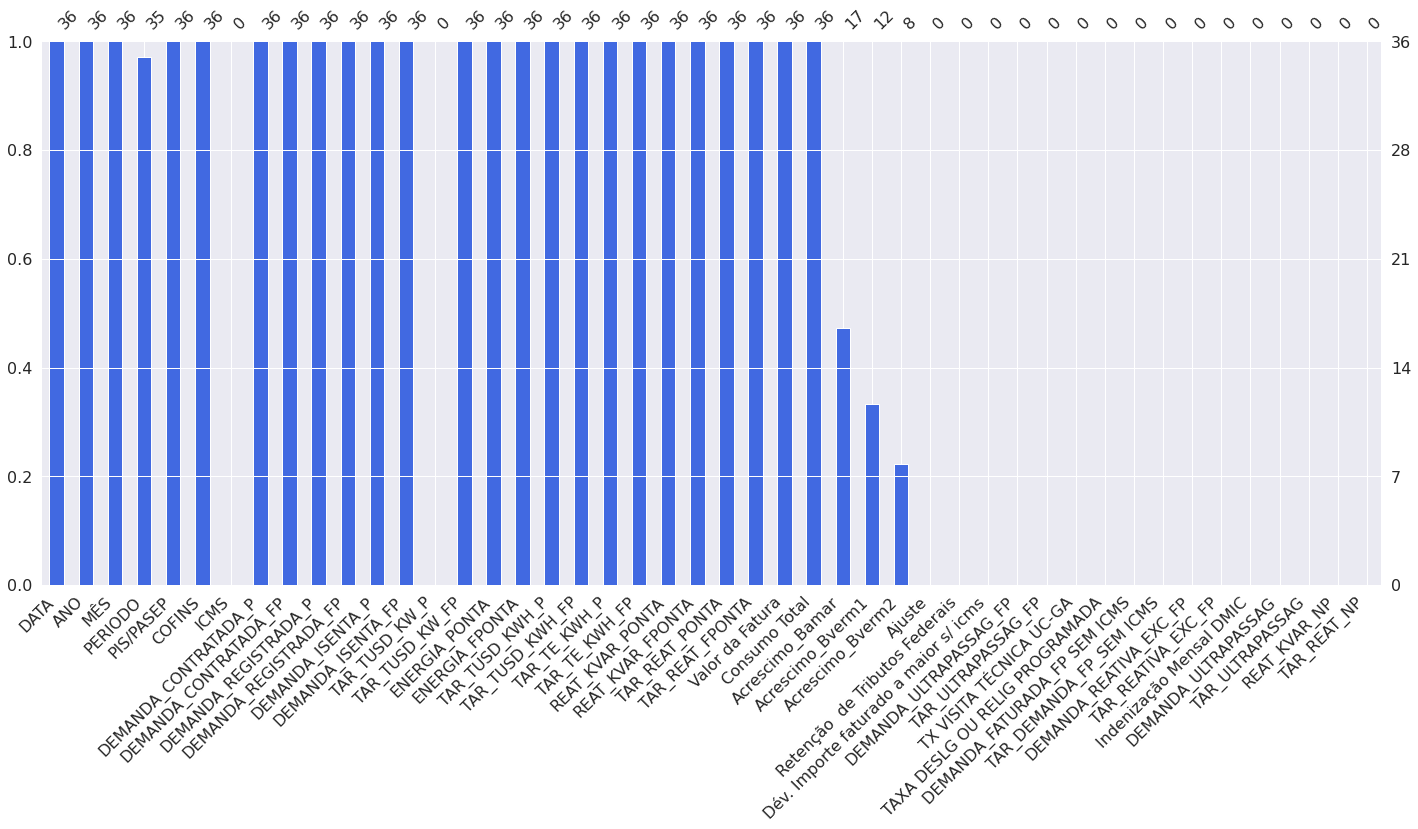

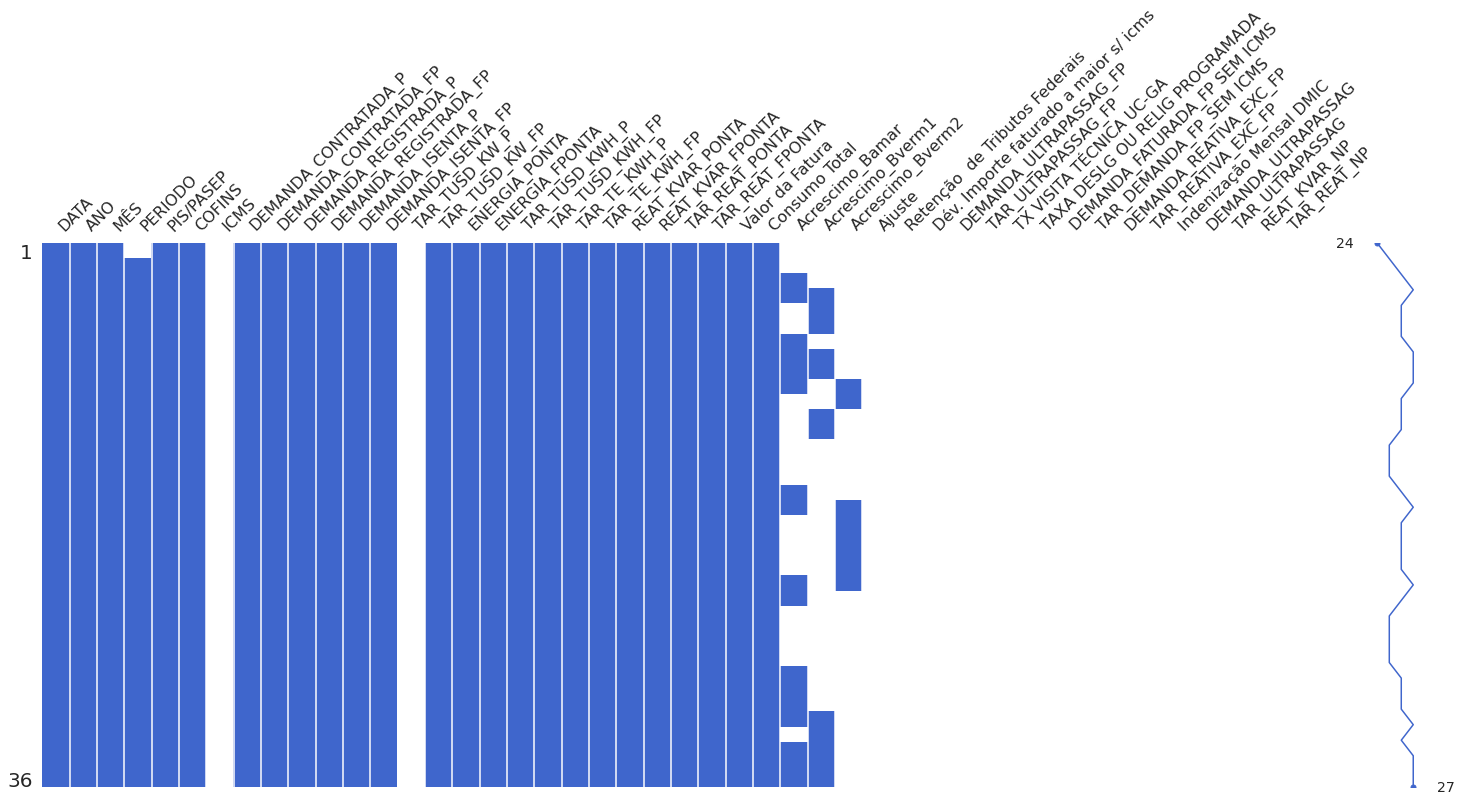

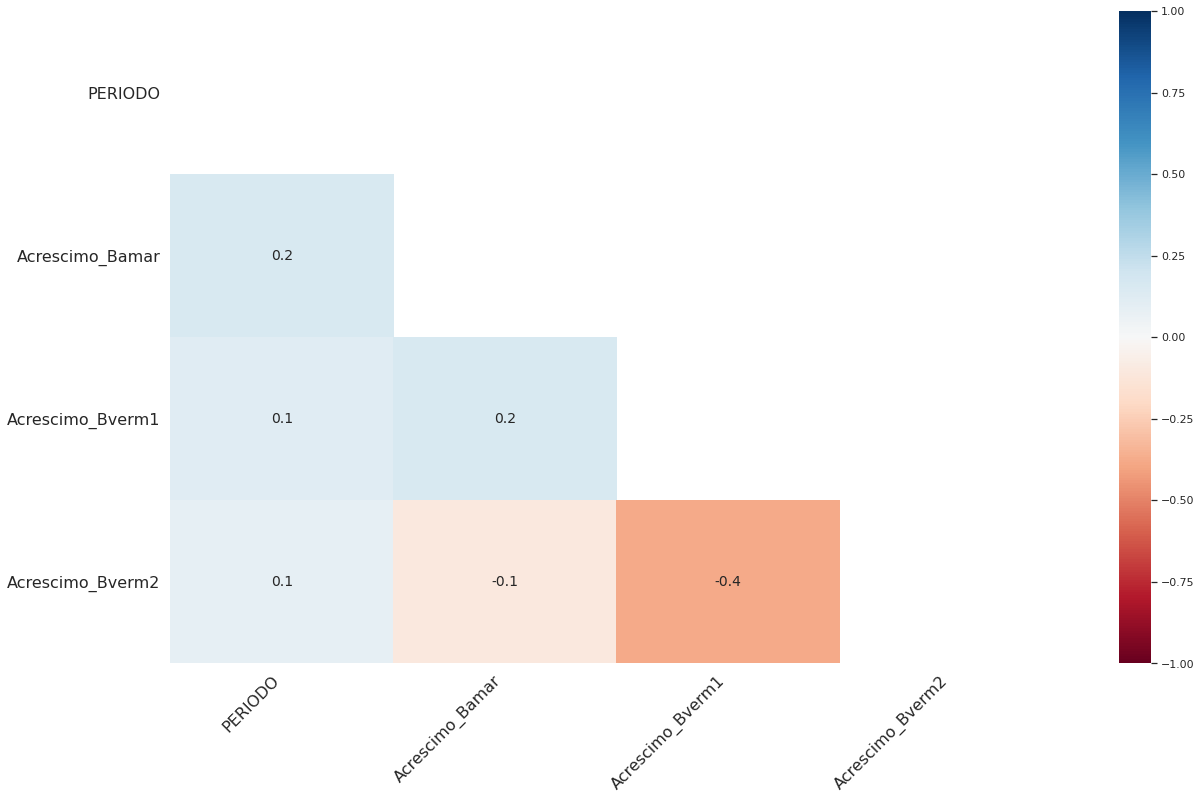

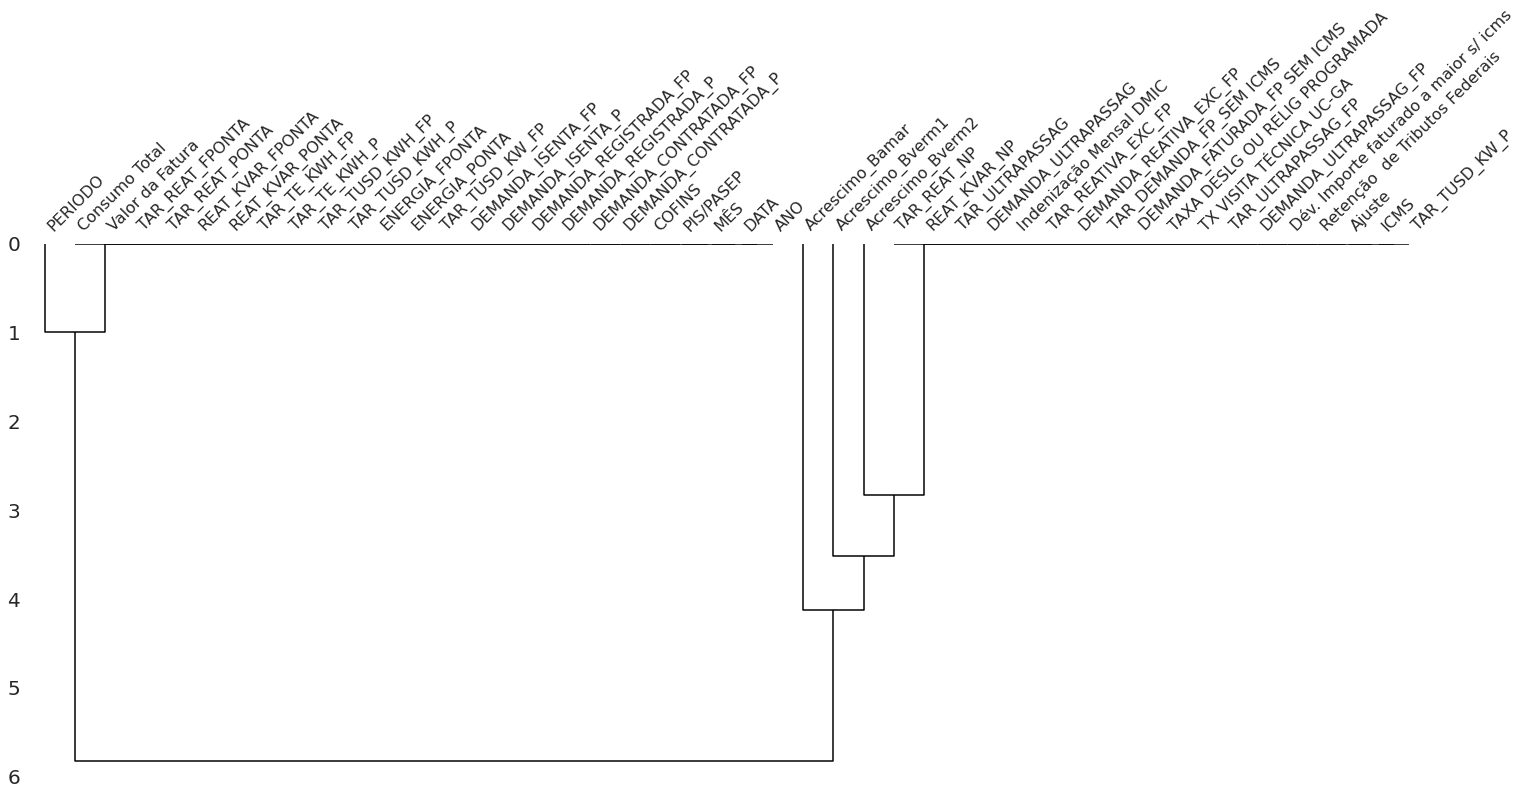

In [ ]:
#Visualização da integridade do DataFrame
#Barras
fig = msno.bar(UC1, color="RoyalBlue")
fig_copy = fig.get_figure()
fig_copy.savefig('DadosFaltantesBarras.png', bbox_inches = 'tight')

#Matriz de posições
fig2 = msno.matrix(UC1, color = (0.25,0.4,0.8))
fig2_copy = fig2.get_figure()
fig2_copy.savefig('DadosFaltantesMatriz.png', bbox_inches = 'tight')

#Matriz de correlação
fig3 = msno.heatmap(UC1)
fig3_copy = fig3.get_figure()
fig3_copy.savefig('DadosFaltantesCorrelacao.png', bbox_inches = 'tight')

#Dendograma
fig4 = msno.dendrogram(UC1)
fig4_copy = fig4.get_figure()
fig4_copy.savefig('DadosFaltantesDendograma.png', bbox_inches = 'tight')

## Eliminação de Dados Faltantes

In [ ]:
#Removendo todas as colunas que tenham uma quantidade de dados inferior a 50%
UC1_df = UC1.drop(set(UC1.columns[UC1.isnull().mean() > 0.5]), 1)

(36, 25)

## Visualização de Variaveis

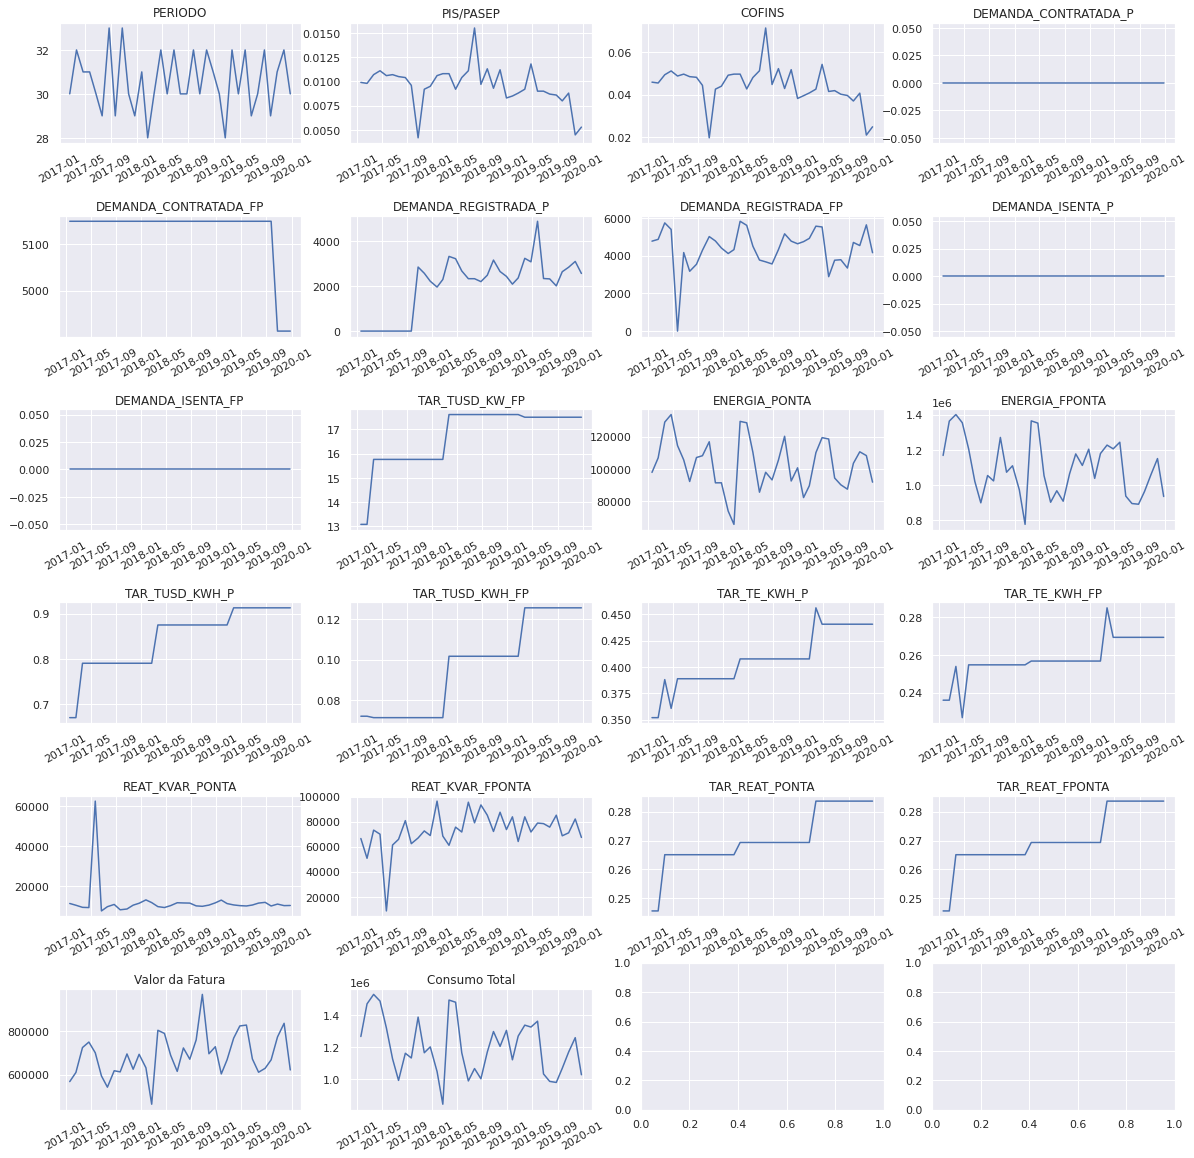

In [ ]:
#Plotando todas as colunas do DF que tenham mais de 50% de dados disponíveis
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_df.columns[3:]):
  plt.subplot(6, 4, i+1)
  plt.title(col)
  plt.plot(UC1_df.DATA, UC1_df[col])
  plt.xticks(rotation=30)  # Disable xticks.
  plt.subplots_adjust(hspace=0.6)

plt.savefig('Variaveis.png')

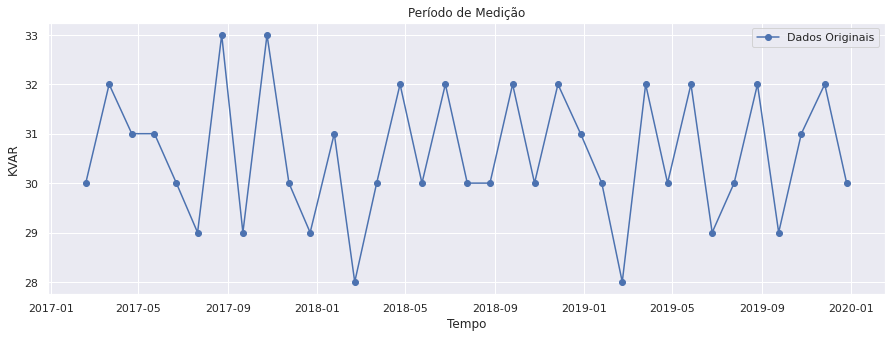

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(UC1_df.DATA, UC1_df.PERIODO, marker='o', color="b")
plt.xlabel("Tempo")
plt.ylabel("KVAR")
plt.legend(['Dados Originais'])
plt.title("Período de Medição")

plt.savefig('Periodo.png')
# plt.show()


## Imputações
https://en.wikipedia.org/wiki/Imputation_(statistics)#:~:text=In%20statistics%2C%20imputation%20is%20the,missing%20data%20with%20substituted%20values.&text=Because%20missing%20data%20can%20create,cases%20that%20have%20missing%20values.

### Imputação utilizando a Moda

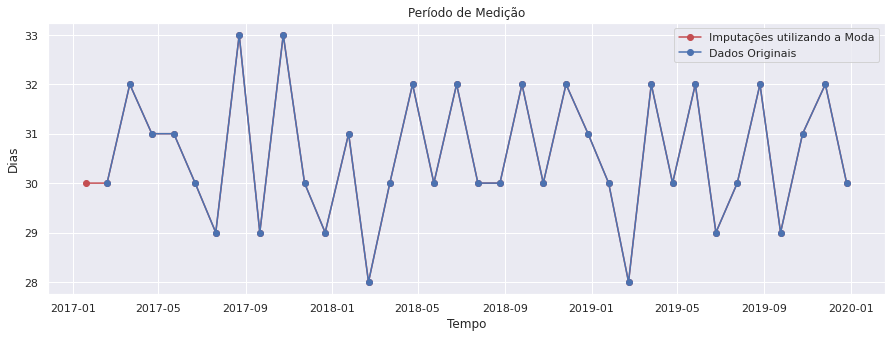

In [ ]:
UC1_KNN = UC1_df.copy(deep= True)
imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(UC1_KNN[["PERIODO"]])
UC1_KNN['PERIODO'] = imputer.transform(UC1_mode[['PERIODO']]).ravel()

sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(UC1_KNN.DATA, UC1_KNN.PERIODO, marker='o', color="r")
plt.plot(UC1_df.DATA, UC1_df.PERIODO, marker='o', color="b")
plt.xlabel("Tempo")
plt.ylabel("Dias")
plt.legend(['Imputações utilizando a Moda', 'Dados Originais'])
plt.title("Período de Medição")
plt.savefig("PeriodoCompleto.png")

# plt.show()

## Outliers
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

### Heatmap

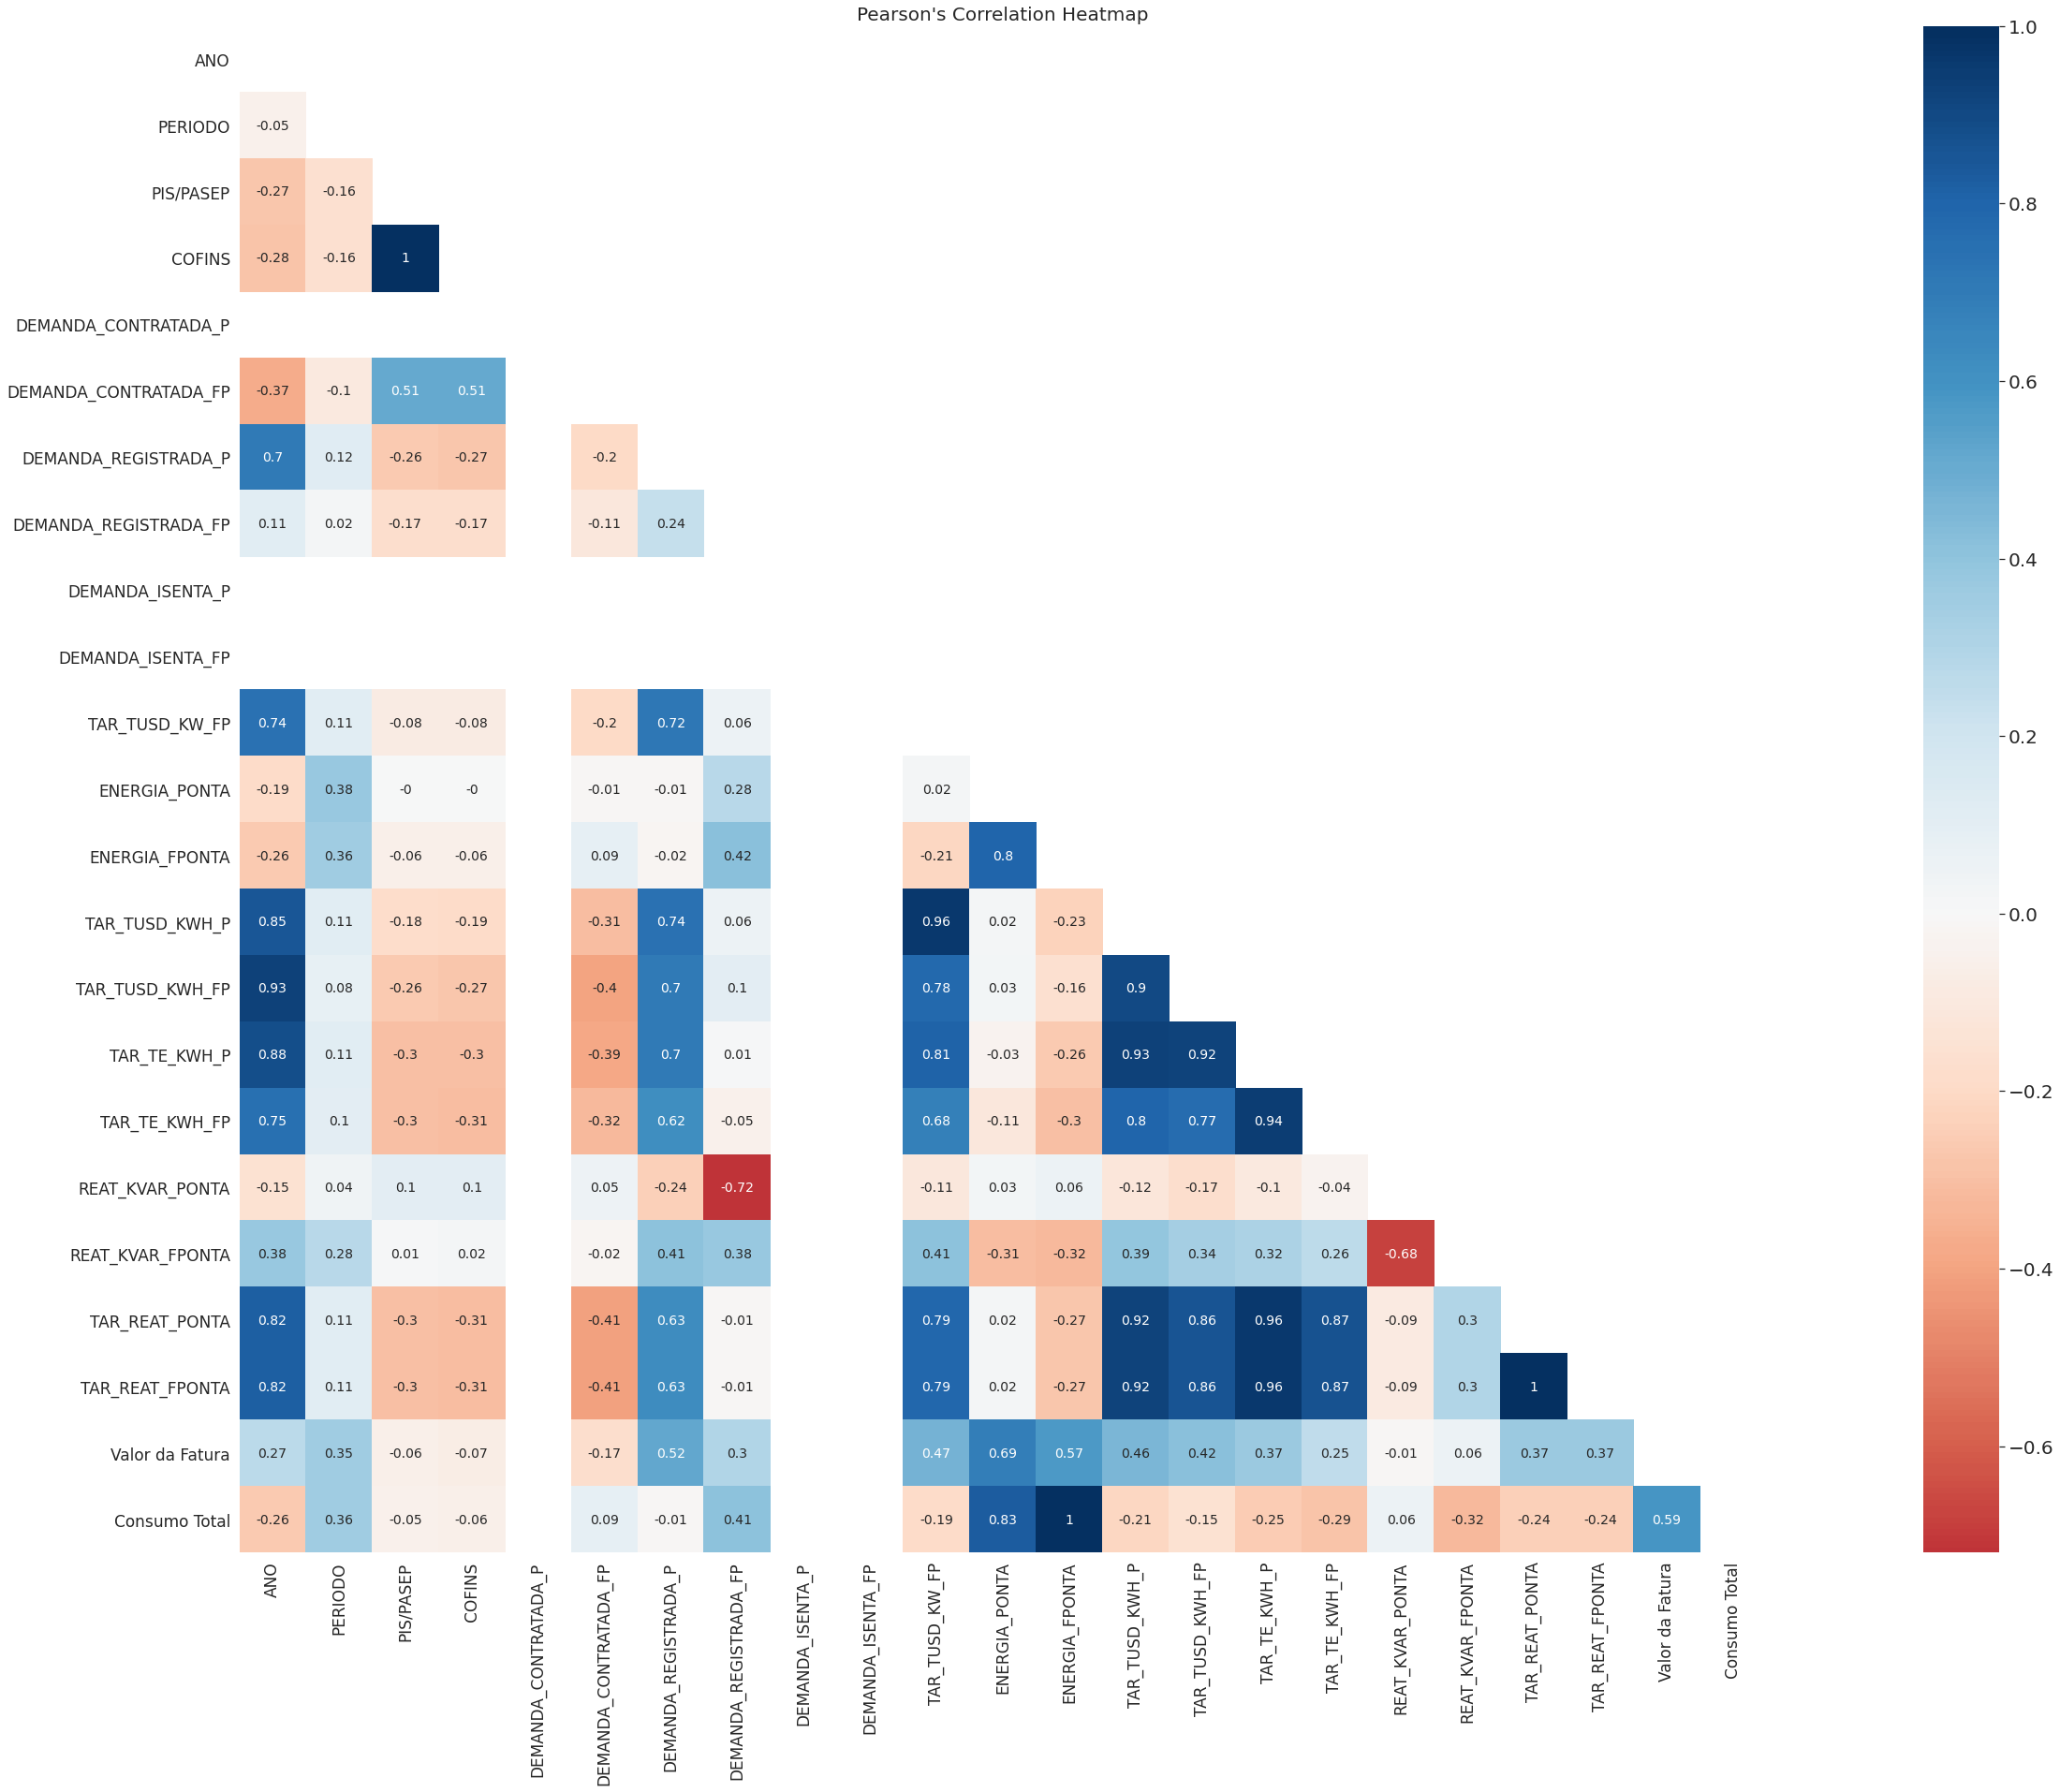

In [ ]:
cor = UC1_KNN
pear = round(cor.corr(),2)
teste = np.array(pear)
mask = np.zeros_like(pear)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(60, 30))
    ax = sns.heatmap(pear, mask=mask, vmax=1, square=True,center=0,annot=True,annot_kws={"fontsize":14}, cmap="RdBu")
    plt.title('''Pearson's Correlation Heatmap''',fontsize = 20)
    plt.xticks(fontsize=17,rotation=90)
    plt.yticks(fontsize=17,rotation=0)
    cax = plt.gcf().axes[-1] #para alterar fonte do eixo y direito
    cax.tick_params(labelsize=20) #para alterar fonte do eixo y direito

### Interquartile range

In [ ]:
def outlier_IQR(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [ ]:
lowerbound , upperbound = outlier_IQR(UC1_KNN["REAT_KVAR_PONTA"])

In [ ]:
UC1_KNN["REAT_KVAR_PONTA"][(UC1_KNN["REAT_KVAR_PONTA"] < lowerbound) | (UC1_KNN["REAT_KVAR_PONTA"] > upperbound)]

4    62640
5     7413
Name: REAT_KVAR_PONTA, dtype: int64

In [ ]:
index_value = [4]
UC1_KNN.at[index_value, 'REAT_KVAR_PONTA'] = UC1_KNN.REAT_KVAR_PONTA.mode()

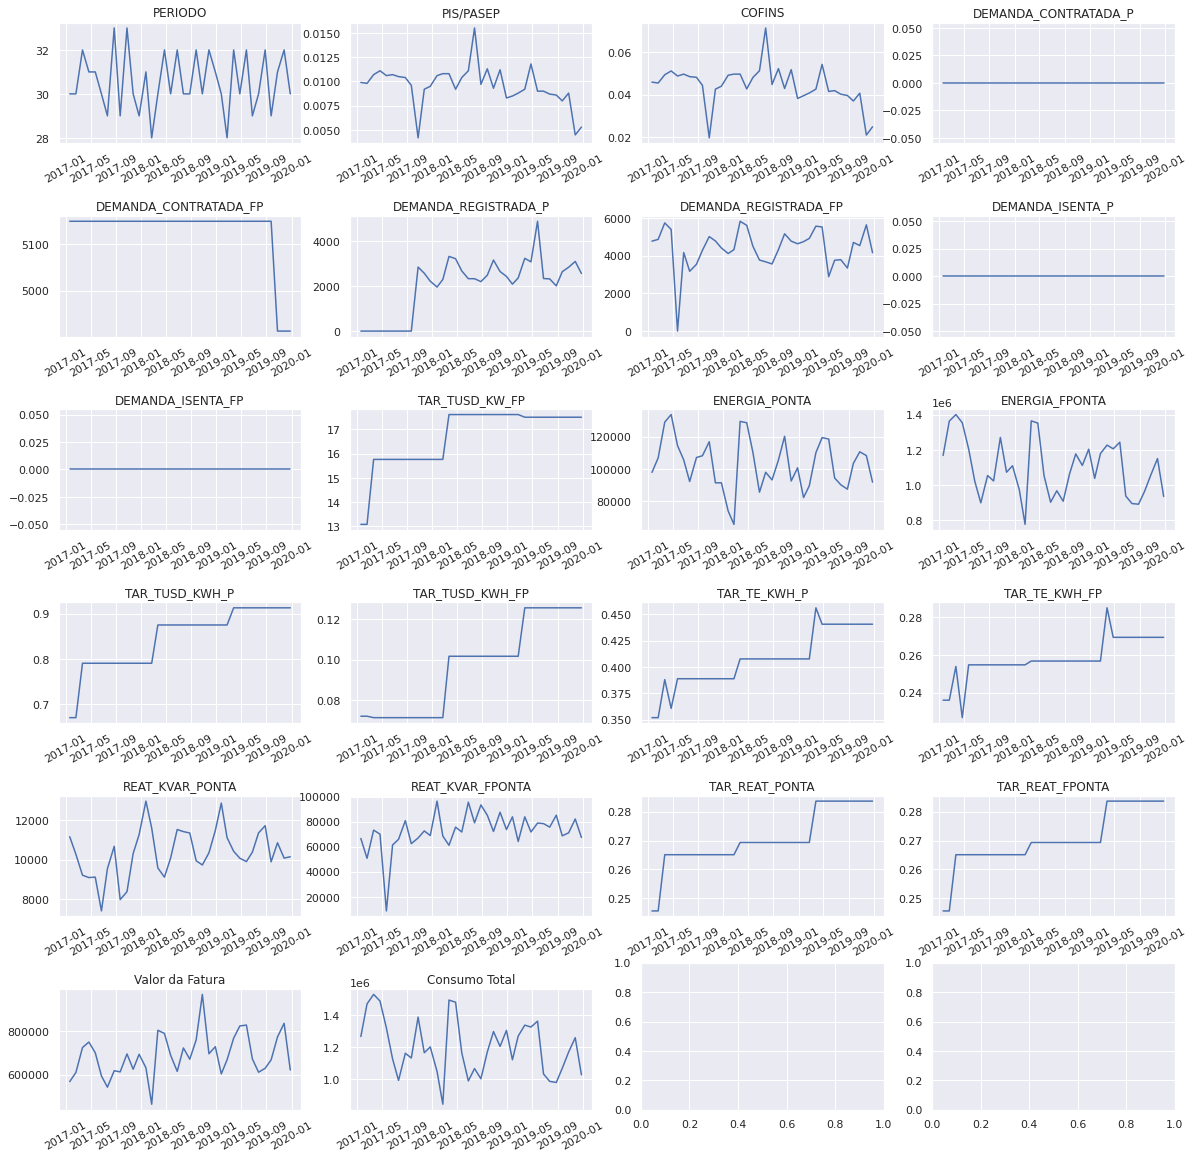

In [ ]:
#Plotando todas as colunas do DF que tenham mais de 50% de dados disponíveis
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_KNN.columns[3:]):
  plt.subplot(6, 4, i+1)
  plt.title(col)
  plt.plot(UC1_KNN.DATA, UC1_KNN[col])
  plt.xticks(rotation=30)  # Disable xticks.
  plt.subplots_adjust(hspace=0.6)

plt.savefig('Variaveis.png')

## Box Diagram

### Devemos fazer isso para todas elas

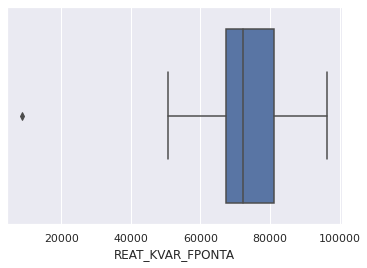

In [ ]:
sns.boxplot(x=UC1_KNN.REAT_KVAR_FPONTA)

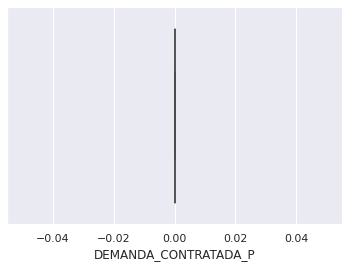

In [ ]:
sns.boxplot(x=UC1_KNN.DEMANDA_CONTRATADA_P)

In [ ]:
index_value = UC1_KNN[["DEMANDA_CONTRATADA_P"]][UC1_KNN[["DEMANDA_CONTRATADA_P"]].eq(160).any(1)].index.tolist()[0]
UC1_KNN.at[index_value, 'DEMANDA_CONTRATADA_P'] = UC1_KNN.DEMANDA_CONTRATADA_P.mode()

IndexError: ignored

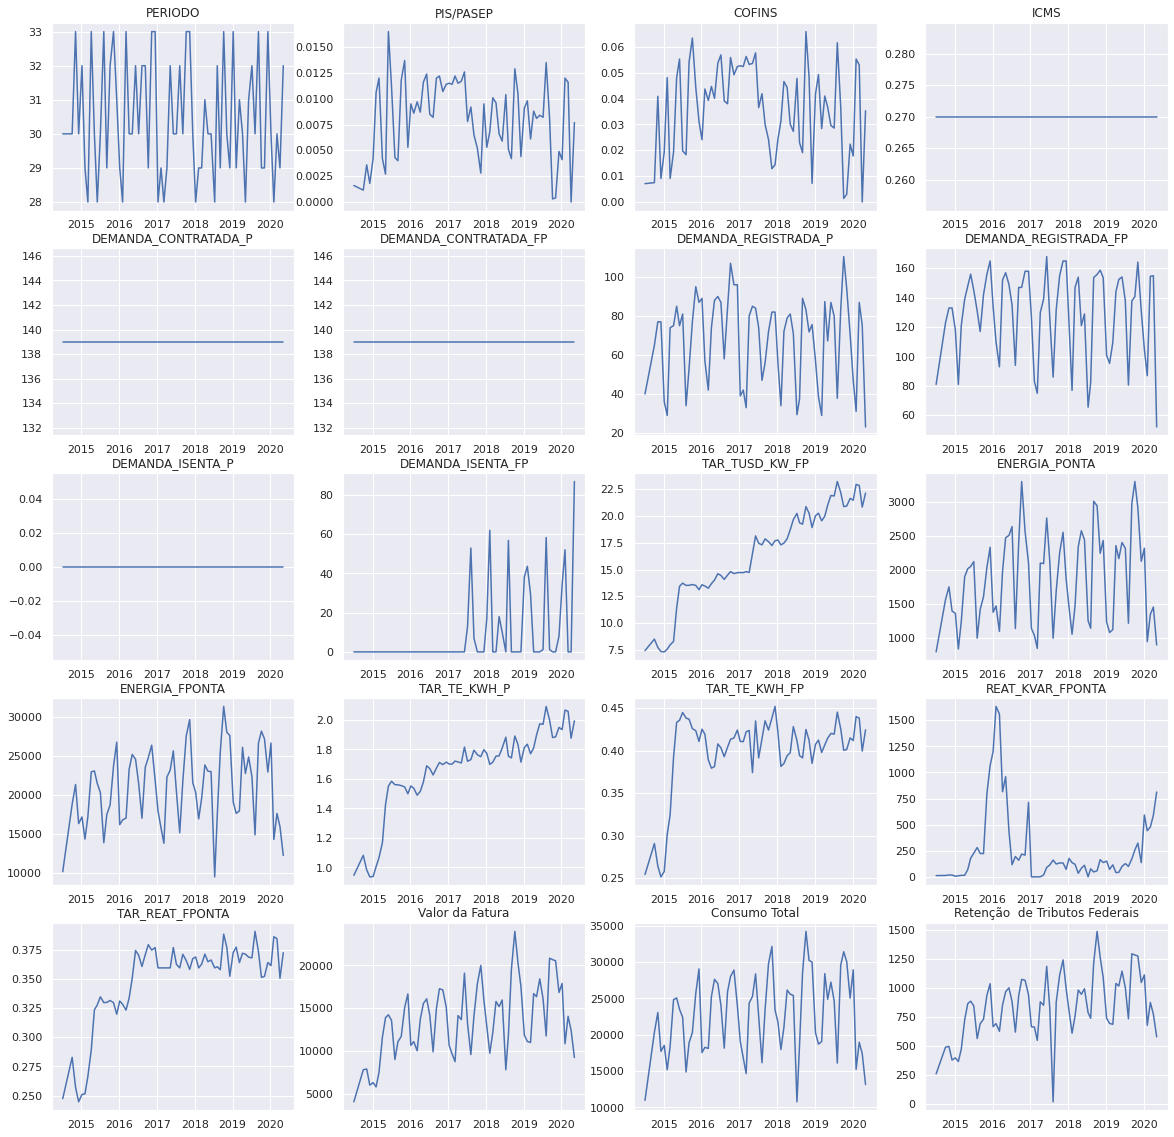

In [ ]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_KNN.columns[3:]):
  plt.subplot(5, 4, i+1)
  plt.title(col)
  plt.plot(UC1_KNN.DATA, UC1_KNN[col])

## Matriz de Correlação de Dados sem outlier

### Heatmap

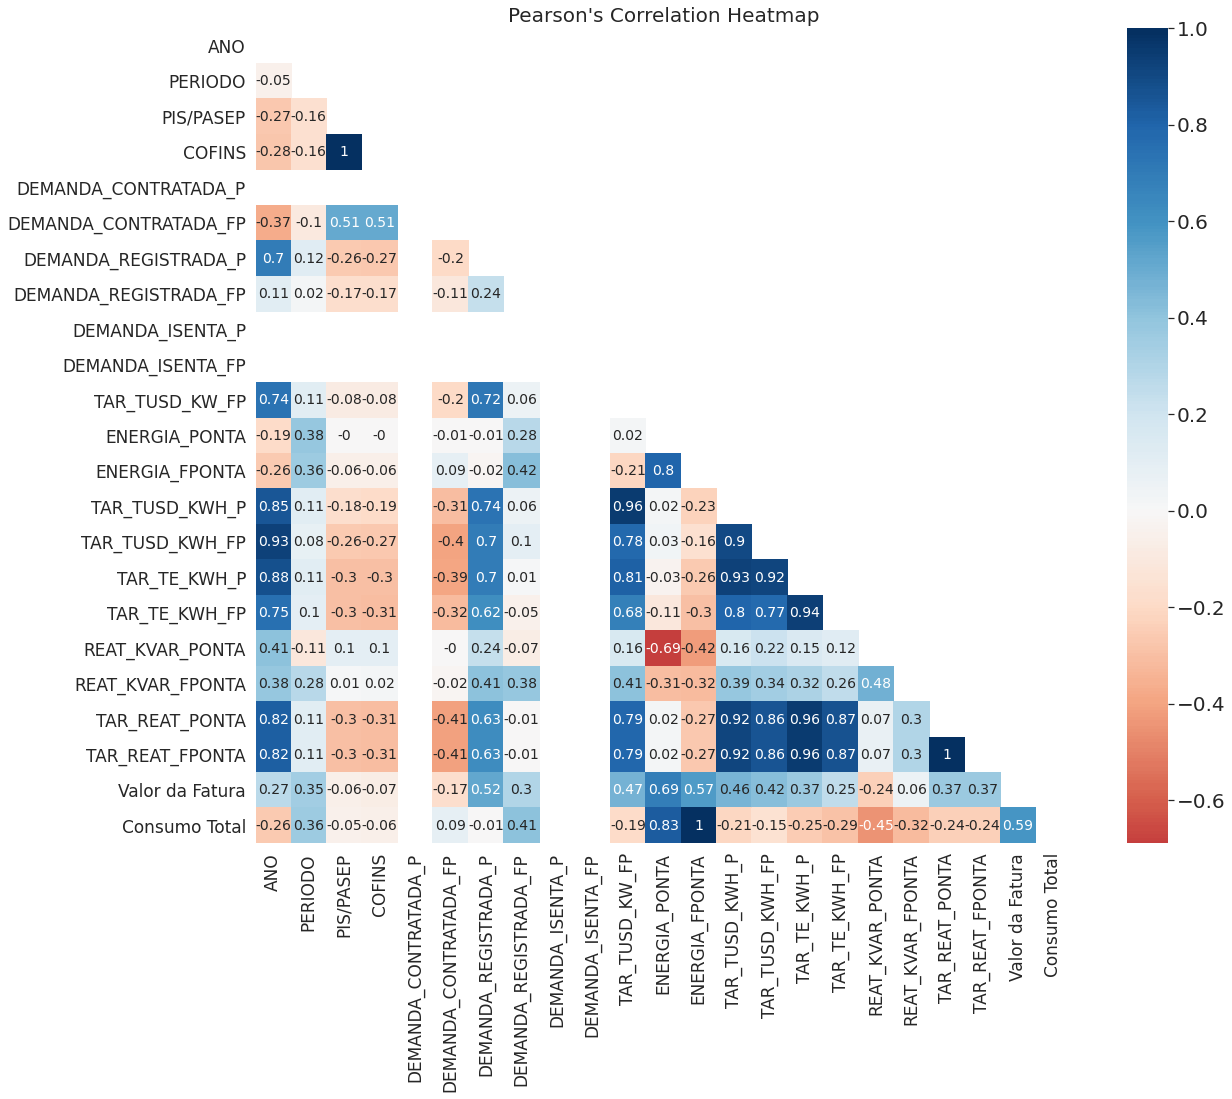

In [ ]:
cor = UC1_KNN
pear = round(cor.corr(),2)
teste = np.array(pear)
mask = np.zeros_like(pear)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(pear, mask=mask, vmax=1, square=True,center=0,annot=True,annot_kws={"fontsize":14}, cmap="RdBu")
    plt.title('''Pearson's Correlation Heatmap''',fontsize = 20)
    plt.xticks(fontsize=17,rotation=90)
    plt.yticks(fontsize=17,rotation=0)
    cax = plt.gcf().axes[-1] #para alterar fonte do eixo y direito
    cax.tick_params(labelsize=20) #para alterar fonte do eixo y direito

### Scatter

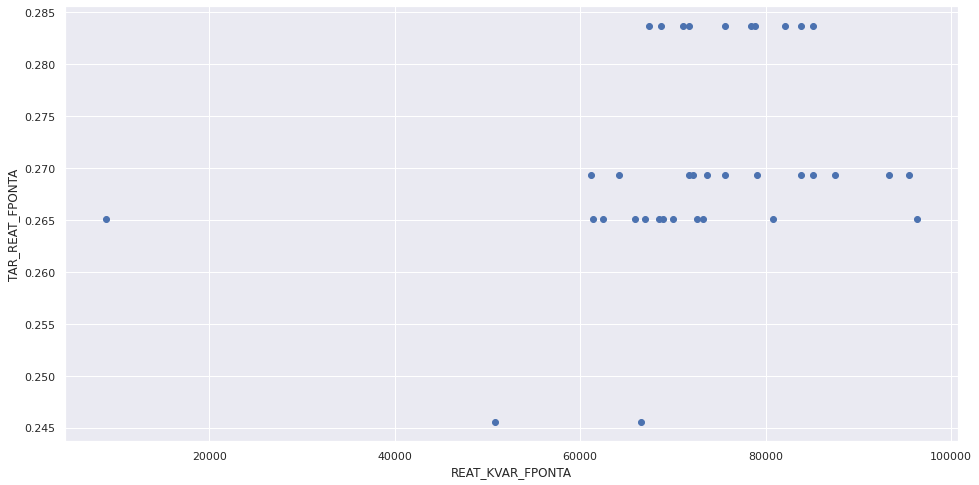

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(UC1_KNN["REAT_KVAR_FPONTA"], UC1_KNN["TAR_REAT_FPONTA"])
ax.set_xlabel('REAT_KVAR_FPONTA')
ax.set_ylabel('TAR_REAT_FPONTA')
plt.show()

## Diagrama de Disperção de Variaveis Correlacionadas

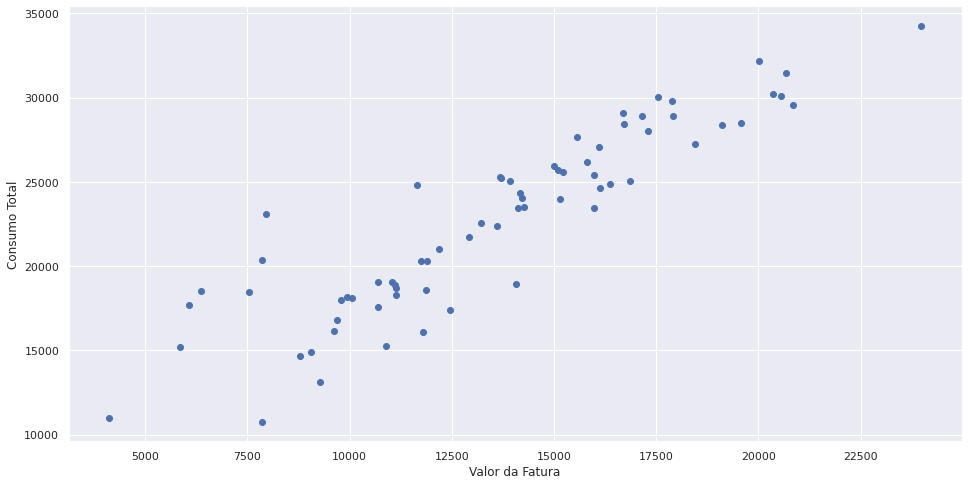

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(UC1_KNN["Valor da Fatura"], UC1_KNN["Consumo Total"])
ax.set_xlabel('Valor da Fatura')
ax.set_ylabel('Consumo Total')
plt.show()

# Modeling

In [ ]:
df_train = UC1_KNN["REAT_KVAR_FPONTA"].iloc[:28]
df_test = UC1_KNN["REAT_KVAR_FPONTA"].iloc[28:]

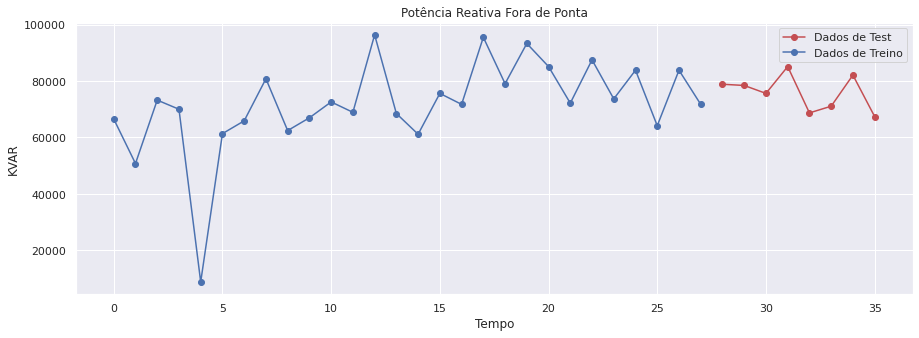

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

In [ ]:
from pmdarima.arima import ADFTest

In [ ]:
adf_test = ADFTest(alpha=0.05)

In [ ]:
adf_test.should_diff(df_train)

(0.3437526200165884, True)

In [ ]:
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=347.127, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=343.616, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=336.915, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=348.269, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=337.508, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=337.362, Time=0.28 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=337.782, Time=0.09 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=339.357, Time=0.35 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=340.758, Time=0.04 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=340.660, Time=0.09 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=337.708, Time=0.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=343.592, Time=0.05 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=338.604, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=338.610, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,1,1)

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   28
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -165.458
Date:                            Wed, 13 Jan 2021   AIC                            336.915
Time:                                    17:49:55   BIC                            339.039
Sample:                                         0   HQIC                           336.893
                                             - 28                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6072      0.316      1.924      0.054      -0.011       1.226
ma.S.L12      -0.7803      0.790     -0.987      0.323      -2.329       0.769
sigma2      2.484e+08   1.71e-09   1.45e+17      0.000    2.48e+08    2.48e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.34   Prob(JB):                         0.54
Heteroskedasticity (H):               1.06   Skew:                             0.38
Prob(H) (two-sided):                  0.95   Kurtosis:                         1.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.25e+34. Standard errors may be unstable.
"""

In [ ]:
# predicoes = pd.DataFrame(arima_model.predict(n_periods = 8), index =df_test.index)
predicoes = pd.DataFrame(arima_model.predict(n_periods = 8))

predicoes.columns = ['predicoes']

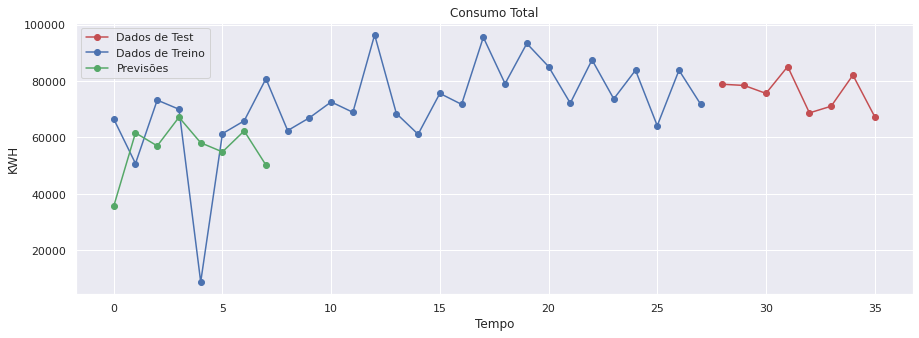

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

# Avaliação

$R M S E=\sqrt{\sum_{i=1}^{n} \frac{\left(\hat{y}_{i}-y_{i}\right)^{2}}{n}}$

In [ ]:
def RMSE(yh, y):
  er = yh - y
  RMSE = sum(er*er/len(er))**0.5
  return RMSE

In [ ]:
np.mean(RMSE(df_test.values, predicoes.values))

22115.174997227594

# Experimento KNN para previsão de 12 meses REAT_KVAR_FPONTA

In [ ]:
Melhor_RMSE = dict.fromkeys(["RMSE_KNN","RMSE_FFILL", "RMSE_Quadratica"])

/usr/local/lib/python3.6/dist-packages/fancyimpute/solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/36 with 0 missing, elapsed time: 0.001
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=523.947, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=521.273, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=525.008, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=518.496, Time=0.17 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=520.495, Time=0.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=520.495, Time=0.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=520.190, Time=0.12 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=522.495, Time=0.42 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=517.016, Time=0.12 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=520.779, Time=0.04 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=519.016, Time=0.21 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=518.452, Time=0.20 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=518.36

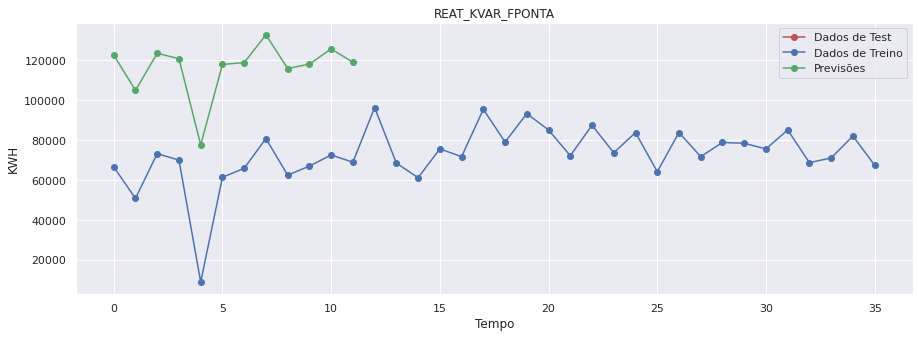

RMSE_KNN: nan


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
knn_imputer = KNN()
UC1_KNN['REAT_KVAR_FPONTA'] = knn_imputer.fit_transform(UC1_KNN[['REAT_KVAR_FPONTA']]).ravel()
df_train = UC1_KNN["REAT_KVAR_FPONTA"].iloc[:57]
df_test = UC1_KNN["REAT_KVAR_FPONTA"].iloc[57:]

arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)
arima_model.summary()
predicoes = pd.DataFrame(arima_model.predict(n_periods = 12))
predicoes.columns = ['predicoes']

fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("REAT_KVAR_FPONTA")
plt.show()

RMSE_KNN = np.mean(RMSE(df_test.values, predicoes.values))
Melhor_RMSE.update({"RMSE_KNN": RMSE_KNN})
print("RMSE_KNN:",RMSE_KNN)

# Experimento FFILL para previsão de 12 meses REAT_KVAR_FPONTA

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=523.947, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=521.273, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=525.008, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=518.496, Time=0.16 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=520.495, Time=0.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=520.495, Time=0.27 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=520.190, Time=0.12 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=522.495, Time=0.41 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=517.016, Time=0.12 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=520.779, Time=0.04 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=519.016, Time=0.28 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=518.452, Time=0.21 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=518.361, Time=0.09 sec
 ARIMA(0,1,0)(3,1,1)[12]             

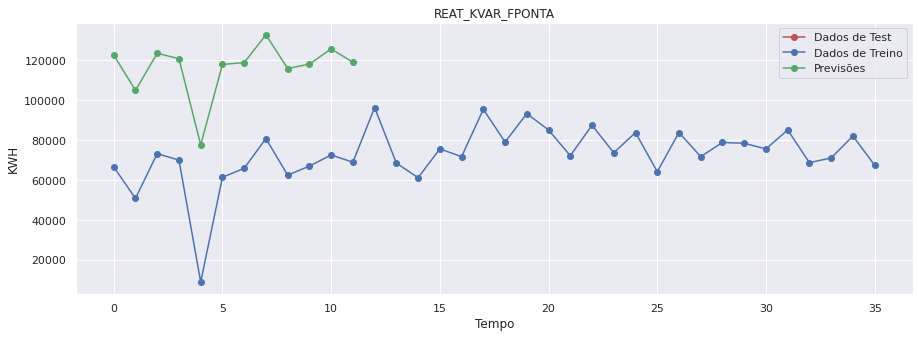

RMSE_FFILL: nan


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
abas_de_excel =  pd.ExcelFile("/content/IT304-Grupo5/Contas de energia UFRJ.xlsx")
abas_de_excel.sheet_names
UC1 = abas_de_excel.parse("UC1")
UC1_df = UC1.drop(set(UC1.columns[UC1.isnull().mean() >0.5]), 1)
UC1_ffill = UC1_df.fillna(method='ffill')
df_train = UC1_ffill["REAT_KVAR_FPONTA"].iloc[:57]
df_test = UC1_ffill["REAT_KVAR_FPONTA"].iloc[57:]
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)
arima_model.summary()
predicoes = pd.DataFrame(arima_model.predict(n_periods = 12))
predicoes.columns = ['predicoes']

fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("REAT_KVAR_FPONTA")
plt.show()

RMSE_FFILL = np.mean(RMSE(df_test.values, predicoes.values))
Melhor_RMSE.update({"RMSE_FFILL": RMSE_FFILL})
print("RMSE_FFILL:",RMSE_FFILL)


# Experimento Imputação por Interpolação Quadrática para previsão de 12 meses REAT_KVAR_FPONTA

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=523.947, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=521.273, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=525.008, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=518.496, Time=0.17 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=520.495, Time=0.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=520.495, Time=0.17 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=520.190, Time=0.08 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=522.495, Time=0.41 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=517.016, Time=0.12 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=520.779, Time=0.04 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=519.016, Time=0.26 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=518.452, Time=0.20 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=518.361, Time=0.09 sec
 ARIMA(0,1,0)(3,1,1)[12]             

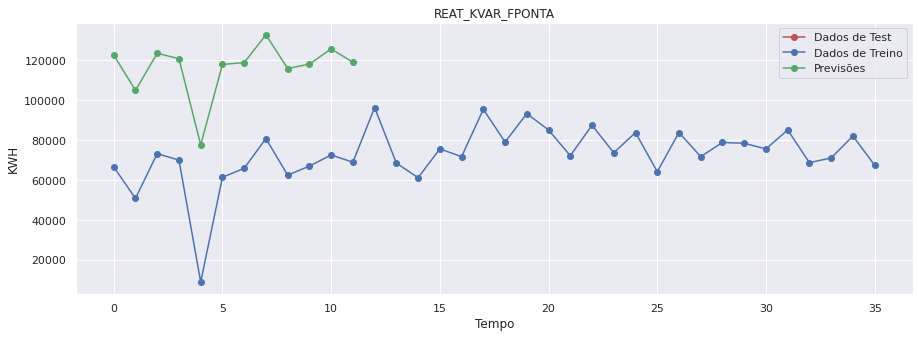

RMSE_Quadratica nan


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
abas_de_excel =  pd.ExcelFile("/content/IT304-Grupo5/Contas de energia UFRJ.xlsx")
abas_de_excel.sheet_names
UC1 = abas_de_excel.parse("UC1")
UC1_df = UC1.drop(set(UC1.columns[UC1.isnull().mean() >0.5]), 1)
UC1_quadratica = UC1_df.copy(deep= True)
UC1_quadratica['REAT_KVAR_FPONTA'].interpolate(method = 'quadratic', inplace = True)
df_train = UC1_quadratica["REAT_KVAR_FPONTA"].iloc[:57]
df_test = UC1_quadratica["REAT_KVAR_FPONTA"].iloc[57:]
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)
arima_model.summary()
predicoes = pd.DataFrame(arima_model.predict(n_periods = 12))
predicoes.columns = ['predicoes']

fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("REAT_KVAR_FPONTA")
plt.show()

RMSE_Quadratica = np.mean(RMSE(df_test.values, predicoes.values))
Melhor_RMSE.update({"RMSE_Quadratica": RMSE_Quadratica})
print("RMSE_Quadratica", RMSE_Quadratica)

In [ ]:
min(Melhor_RMSE, key=Melhor_RMSE.get)

'RMSE_KNN'

# Comparação de PMF

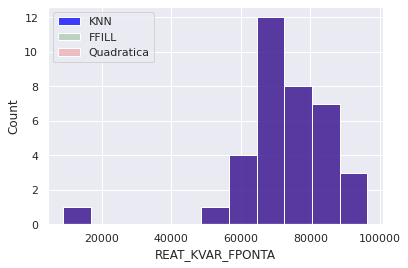

In [ ]:
sns.histplot(UC1_KNN["REAT_KVAR_FPONTA"],color="blue")
sns.histplot(UC1_ffill["REAT_KVAR_FPONTA"],color="green", alpha=0.2)
sns.histplot(UC1_quadratica["REAT_KVAR_FPONTA"],color="red", alpha=0.2)
plt.legend(['KNN', 'FFILL', 'Quadratica'])

# Resultado Banco de dados com imputações KNN

In [ ]:
UC1_KNN.describe()

ANO    PERIODO  ...  Valor da Fatura  Consumo Total
count    36.000000  36.000000  ...        36.000000   3.600000e+01
mean   2018.000000  30.555556  ...    688481.413889   1.201152e+06
std       0.828079   1.318970  ...     98700.253238   1.740081e+05
min    2017.000000  28.000000  ...    462557.260000   8.434980e+05
25%    2017.000000  30.000000  ...    616867.087500   1.061706e+06
50%    2018.000000  30.000000  ...    680845.750000   1.169477e+06
75%    2019.000000  32.000000  ...    753074.077500   1.321147e+06
max    2019.000000  33.000000  ...    971412.250000   1.529442e+06

[8 rows x 23 columns]

In [ ]:
UC1_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATA                   36 non-null     datetime64[ns]
 1   ANO                    36 non-null     int64         
 2   MÊS                    36 non-null     object        
 3   PERIODO                36 non-null     float64       
 4   PIS/PASEP              36 non-null     float64       
 5   COFINS                 36 non-null     float64       
 6   DEMANDA_CONTRATADA_P   36 non-null     int64         
 7   DEMANDA_CONTRATADA_FP  36 non-null     int64         
 8   DEMANDA_REGISTRADA_P   36 non-null     float64       
 9   DEMANDA_REGISTRADA_FP  36 non-null     float64       
 10  DEMANDA_ISENTA_P       36 non-null     int64         
 11  DEMANDA_ISENTA_FP      36 non-null     int64         
 12  TAR_TUSD_KW_FP         36 non-null     float64       
 13  ENERGIA

ValueError: ignored

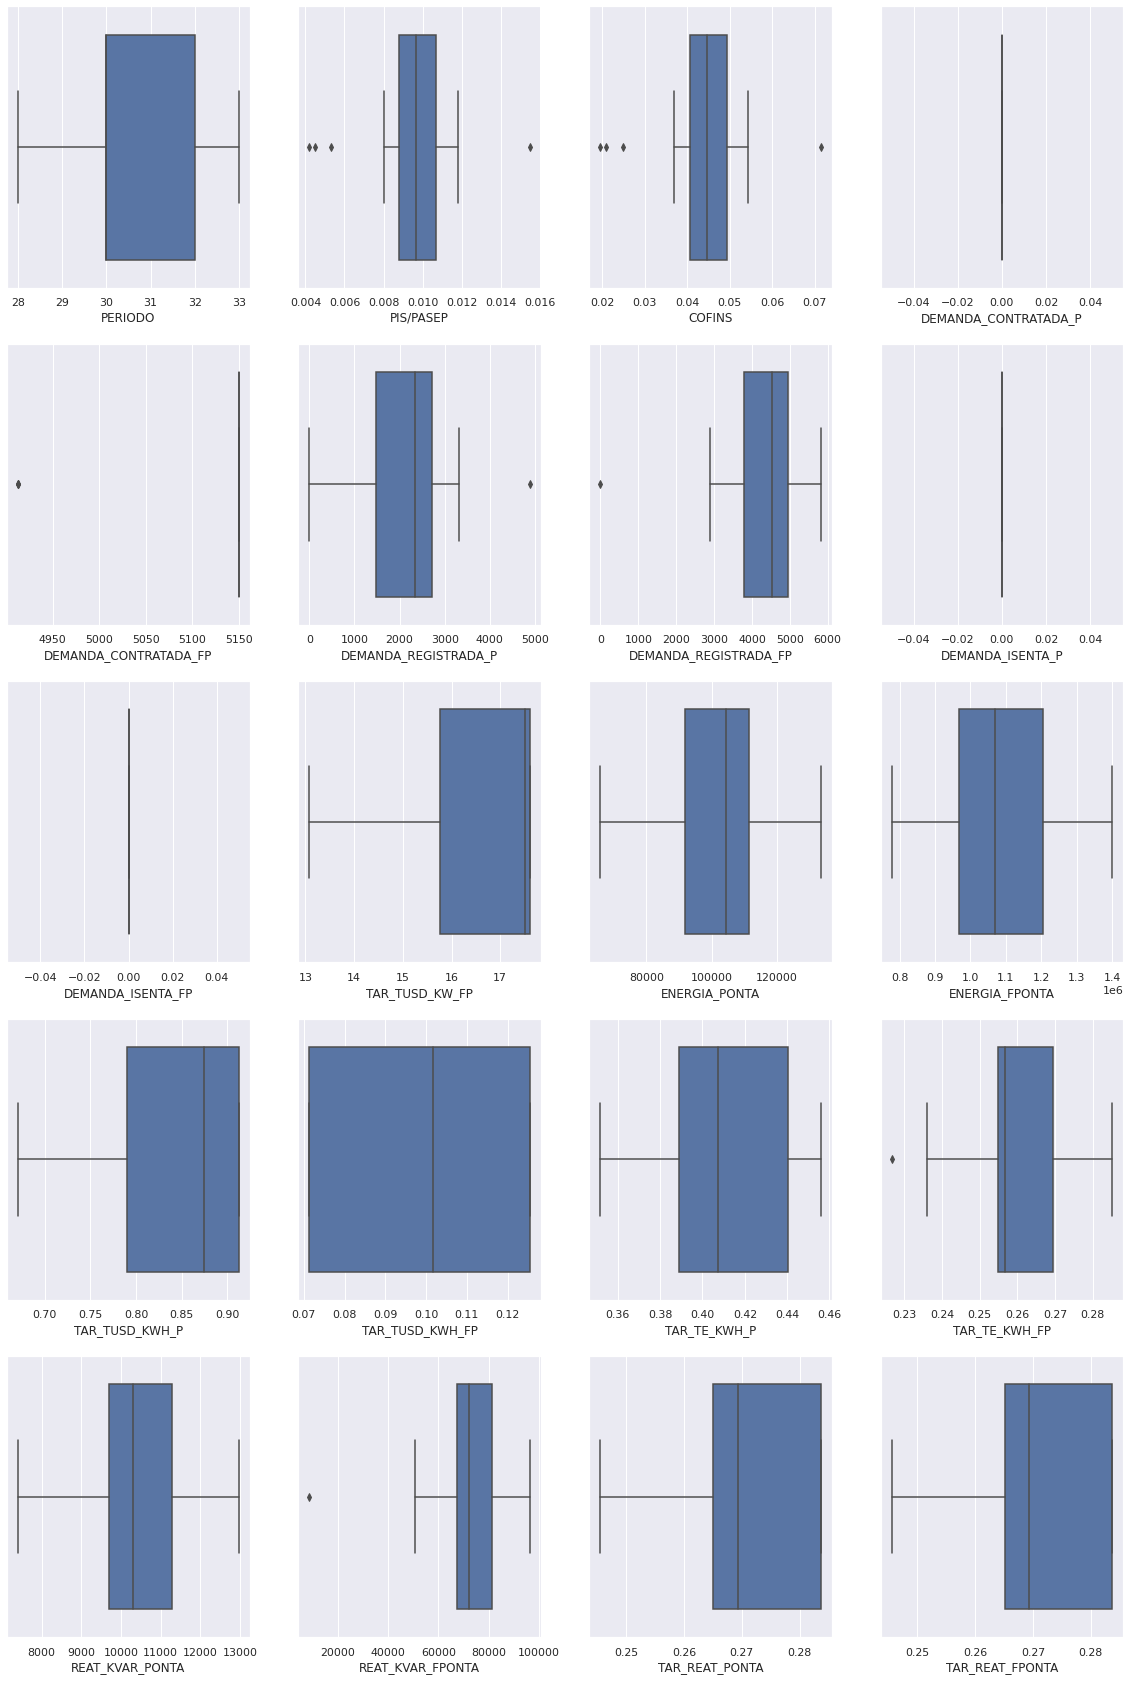

In [ ]:
f, axs = plt.subplots(5, 4,figsize=(20,30))
for i,col in enumerate(UC1_KNN.columns[3:]):
  plt.subplot(5, 4, i+1)
  sns.boxplot(x=UC1_KNN[col])

ValueError: ignored

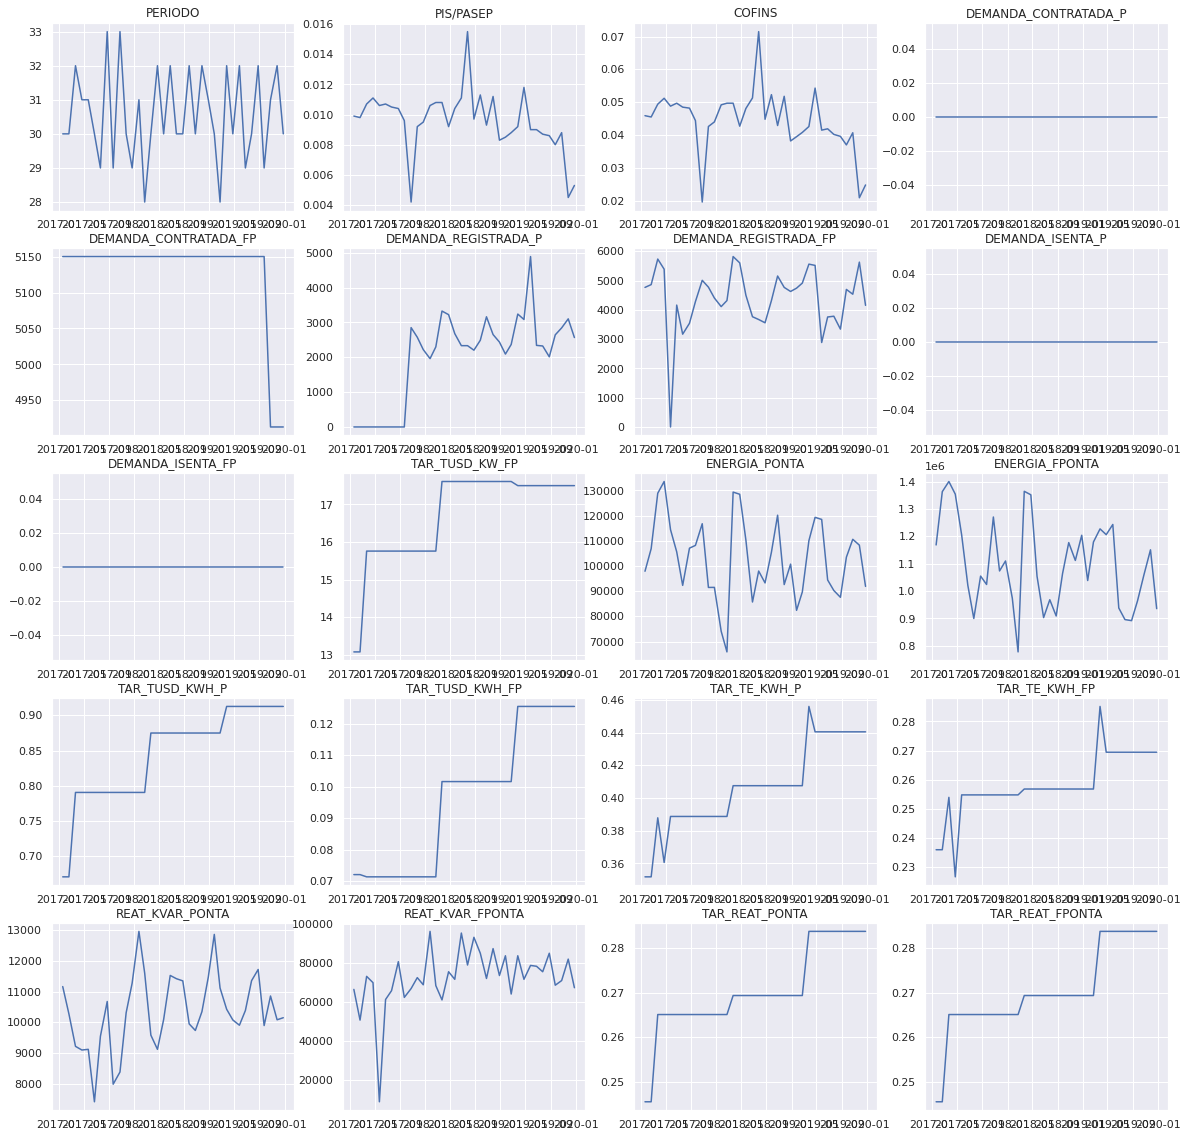

In [ ]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_KNN.columns[3:]):
  plt.subplot(5, 4, i+1)
  plt.title(col)
  plt.plot(UC1_KNN.DATA, UC1_KNN[col])

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
UC1_KNN.hist(ax = ax);

In [ ]:
UC1_KNN.to_csv(r'UC1.csv', index = False)

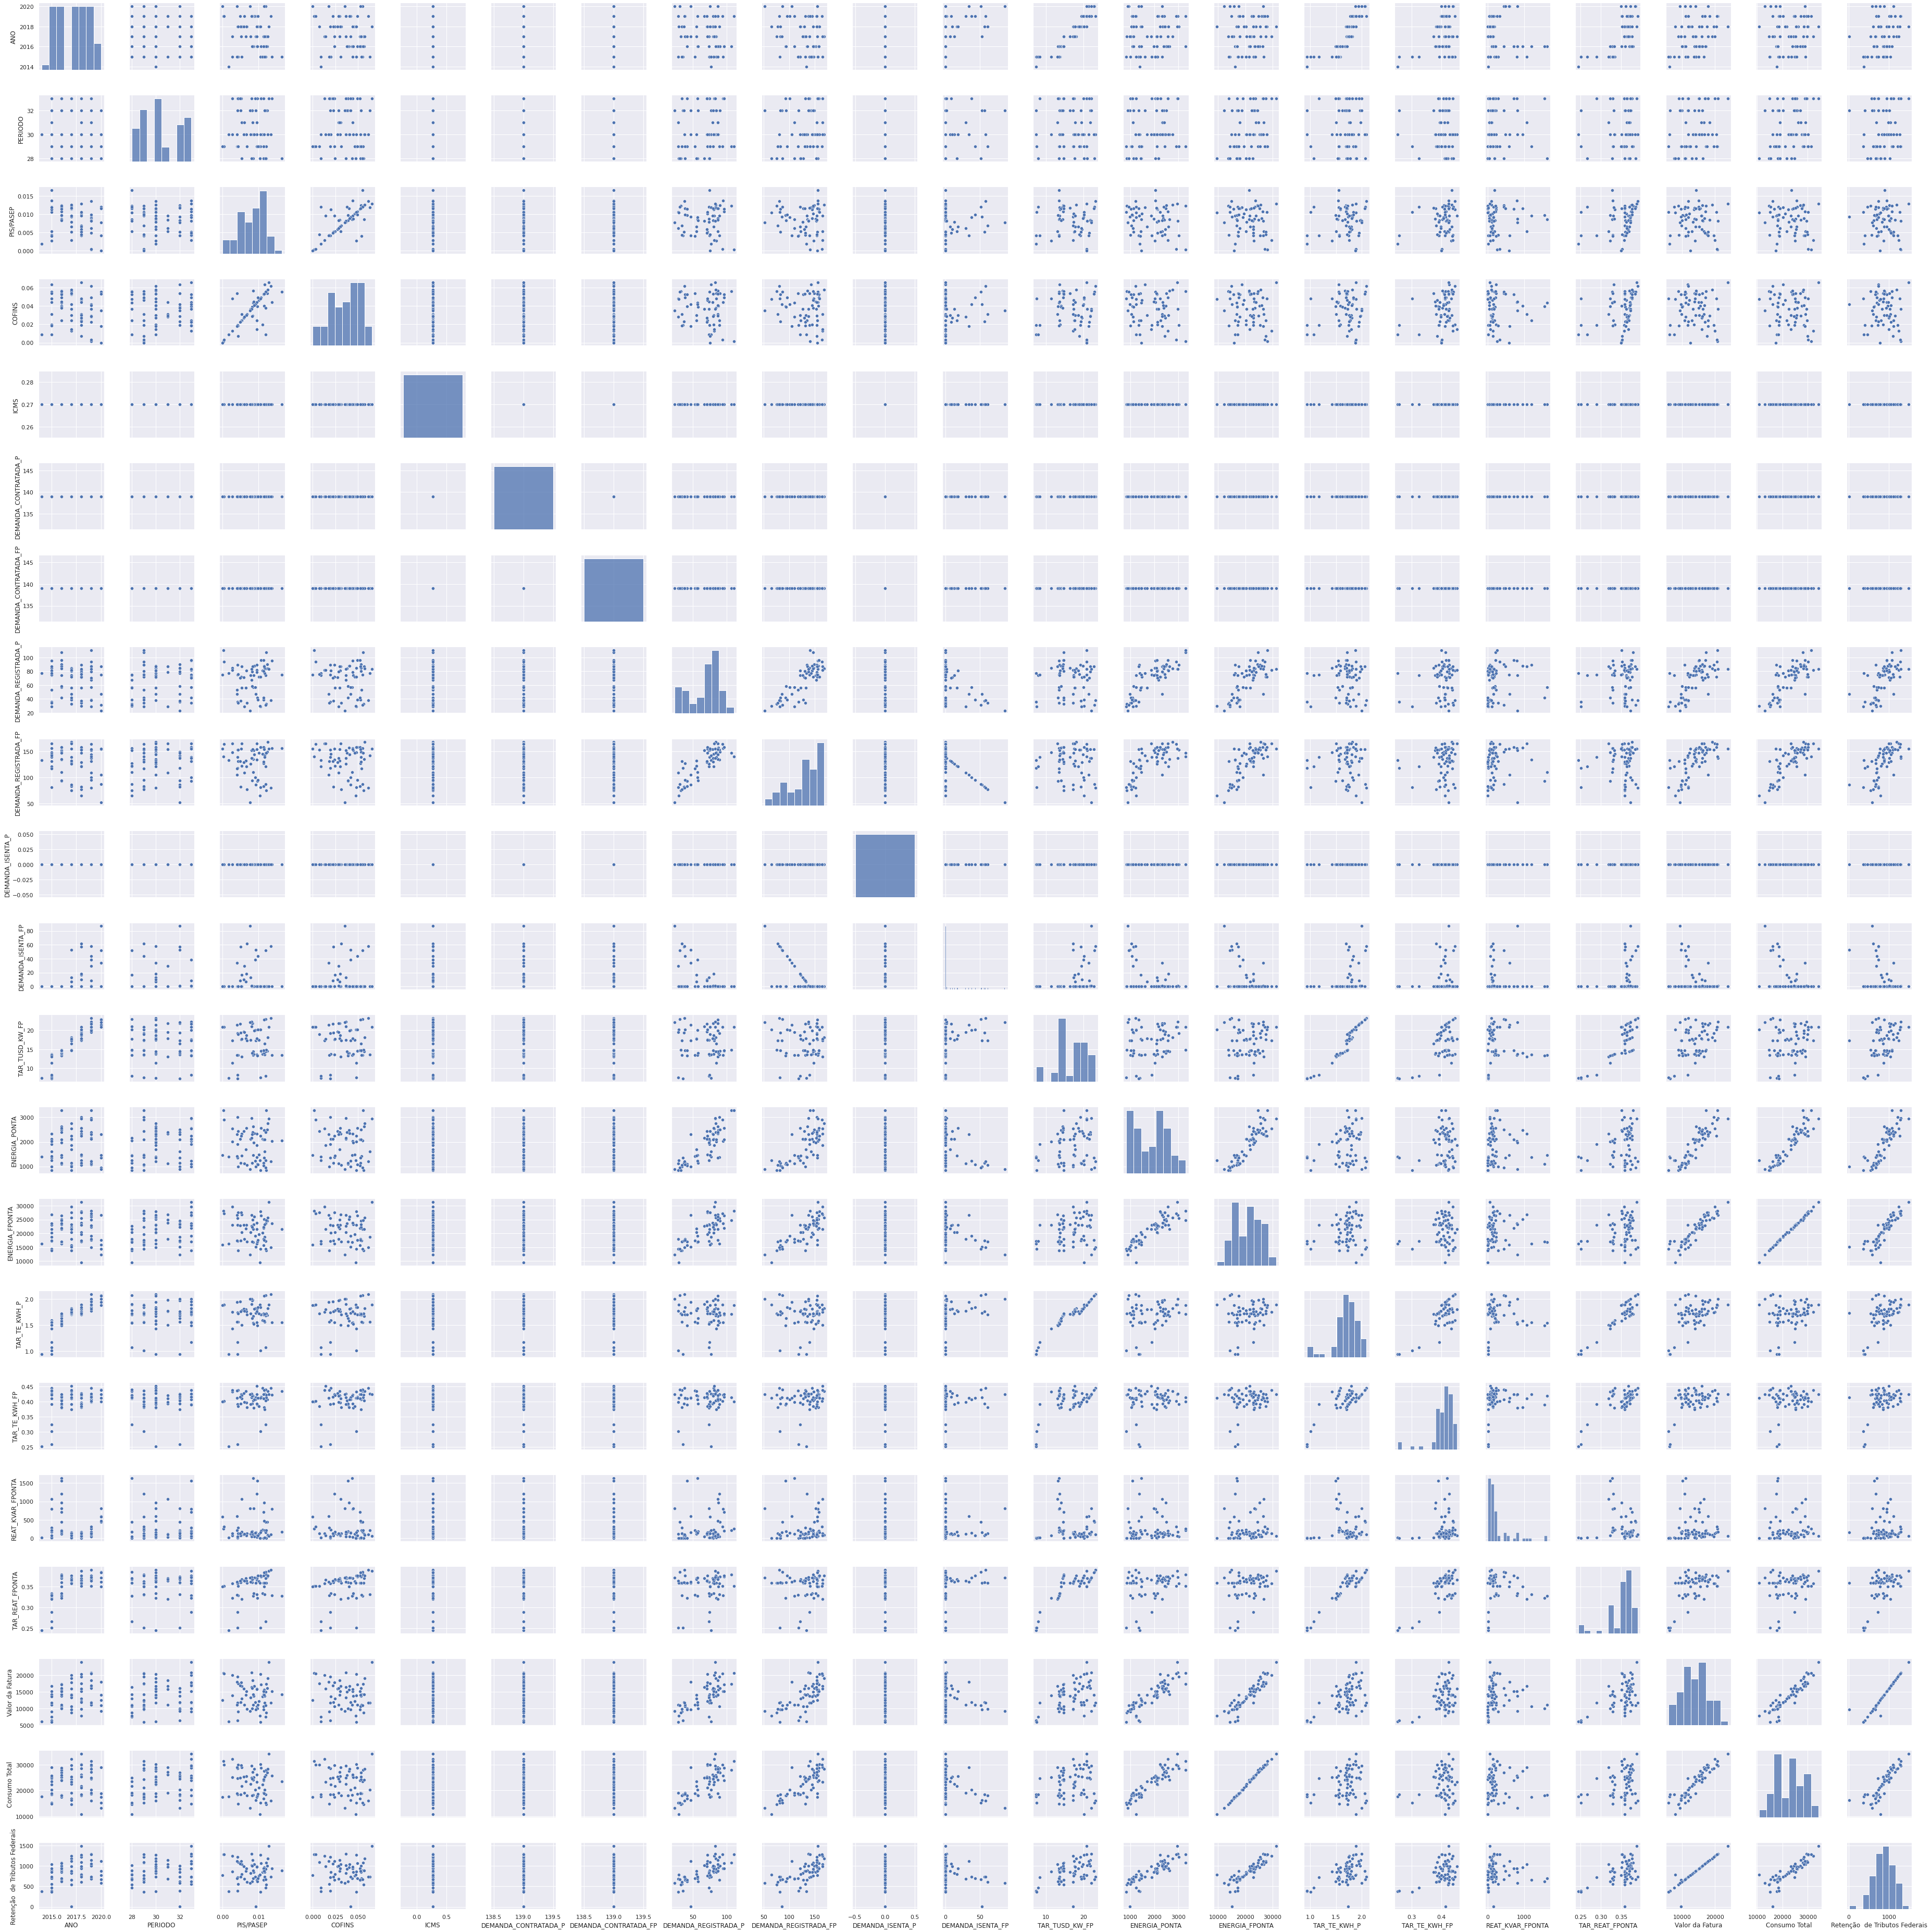

In [ ]:
sns.pairplot(UC1_KNN[3:], palette='bwr')